Modelling Epidemics:

To begin, let us look at one of the most basic models in epidemiology: The SIR model. The SIR model contains three parameters:
     
S(t) = the number of susceptible individuals in a population
I(t) = the number of infected individuals in a population
R(t) = the number of recoved individuals in a population

In order to draw up some ODEs to work with, let us make some assumptions regarding these parameters:

1. Assume that the population is closed, such that there are no births, deaths, and there is no migration. The birth and death rate can be reasonably neglected in this model because we are assuming that the disease has a far shorter lifespan than a human.

2. Assume that a recovered individual has complete immunity from the disease. In other words, only susceptible people are at risk of becoming infected.


We also note that due to the closed nature of the population, that:

$S(t) + I(t) + R(t) = N (=1)$

where we set $N=1$ such that we are looking at the proportions of the population rather than the absolute figures.


Let us consider the ODE for suspectibility:

$\frac{dS}{dt} = - \frac{\beta S(t)I(t)}{N}$

This follows naturally from a number of logical observations, notably:

1. The number of susceptible people should decrease over time, thus the equation is negative.

2. We assume that the rate of change is dependent on the number of susceptible people and the number of infected people. More specifically, we anticipate that the greater the number of the infected, the more contact there is between the infected and the susceptible, and thus the greater the rate of change. Additionally, this logic of increased contact holds for the number of susceptible people too.

What then, is $\beta$? $\beta$ is clearly some measure of the contact between the infected and the susceptible. One could envision it as a measure of the number of disease transmission between these two groups; the more infective the disease is, the higher $\beta$ is.


Let us look next at the recovery equation:

$\frac{dR}{dt} = \gamma I(t)$

This is also fairly intuitive to work out: The rate of change of the number of recovered people is dependent on the number of the infected, by some factor of recovery $\gamma$. If there are more infected people, we would expect the number of recovered people per unit time to increase with it. If the recovery rate $\gamma$ is higher, then the rate of change would again be higher.

Finally, to derive the infected equation, simply note that:

$\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$


This yields:

$\frac{dI}{dt} = \frac{\beta S(t)I(t)}{N} - \gamma I(t)$


The equations in the SIR model are then as follows:

$\frac{dS}{dt} = -\beta S(t)I(t)$

$\frac{dI}{dt} = \beta S(t)I(t) - \gamma I(t)$

$\frac{dR}{dt} = \gamma I(t)$

Where $N = 1$

Let us proceed by modelling these equations in Python and playing around with some of the initial conditions. Then, we can continue to think about what these values represent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
def SIR(y, t, beta, gamma):
    S, I, R = y
    
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma*I
    dR_dt = gamma * I
    
    return [dS_dt, dI_dt, dR_dt]

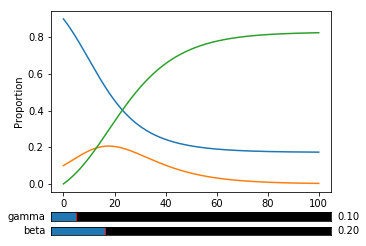

In [3]:
# initial conditions:
S0 = 0.9
I0 = 0.1
R0 = 0.0
beta = 0.2
gamma = 0.1

t = np.linspace(0,100,10000)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

l1, l2, l3 = plt.plot(t, integrate.odeint(SIR, [S0, I0, R0], t, args=(beta, gamma)), label=('S0', 'I0', 'R0'))
#solution = np.array(solution)

axcolor = 'black'
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_g = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sa = Slider(ax_b, 'beta', 0.01, 1, valinit=beta)
sc = Slider(ax_g, 'gamma', 0.01, 1, valinit=gamma)


def update(val):
    beta = sa.val
    gamma = sc.val
    y = integrate.odeint(SIR, [S0,I0,R0], t, (beta, gamma))
    l1.set_ydata(y[:,0])
    l2.set_ydata(y[:,1])
    l3.set_ydata(y[:,2])
    fig.canvas.draw_idle()

sa.on_changed(update)
sc.on_changed(update)
#plt.legend()
ax.set(xlabel='time', ylabel='Proportion')
plt.show()

Let us continue by thinking about $\beta$ and $\gamma$, for they are highly useful in epidemiology.

Specifically, we can define a quantity $R_0$ as:

$R_0 = \frac{\beta}{\gamma}$

where $R_0$ is defined as the basic reproduction number; the average number of individuals infected from one other person. If $\beta$, the measure of how contagious the disease is, increases, then one person will infect more people, and $R_0$ increases. If $\gamma$, the measure of recovery, increases, then an infected person will recover in fewer days and will infect fewer people, and $R_0$ goes down.

For reference, here are some $R_0$ values of some infamous diseases:

Measles: $R_0$ = 12-18 (highest known $R_0$)
HIV: $R_0$ = 2-5
COVID-19: $R_0$ = 1.4-3.9 (calculated in Feb 2020)

Note that the parameters $\beta$ and $\gamma$ are fixed for a particular disease, and thus $R_0$ is specific to a disease. It has no dependence on any other factors, such as the number of people immune to the disease. As such, we assume that $R_0$ is a measure of the number of people who would be infected by one other person in a population with absolutely no herd immunity. However, the parameters $\beta$ and $\gamma$ can be affected by other parameters, such as the climate.

From $R_0$ then, we can calculate the Herd Immune Threshold as follows:

$R_0(1-p) = 1$

$p_c = 1 - \frac{1}{R_0}$

where $p_c$ is the HIT required to stop the spread of a disease.

Let us continue to expand upon the SIR model by considering what the ODEs would look like with an open population, with a birth rate $\mu$ and a death rate $\nu$. Let us assume that:

1. The population, N, remains constant. More specifically, let us assume the specific case that $\mu = \nu$ and there is no migration.

2. All newborns are susceptible. There is no vertical transfer of immunity from mother to foetus.

The equations are as follows:

$\frac{dS}{dt} = -\frac{\beta S(t)I(t)}{N} + \mu N - \nu S(t)$

$\frac{dI}{dt} = \beta S(t)I(t) - \gamma I(t) - \nu I(t)$

$\frac{dR}{dt} = \gamma I(t) - \nu R(t)$

In this case, the number of new individuals born per unit time is equal to the population N multiplied by the birth rate $\mu$, and all newborns are susceptible as per the assumption above. Thus this represents an addition to the $\frac{dS}{dt}$ term. The death rate, however, affects all groups, and so is a subtraction from all equations.

Before we move on to analyse numerous variants of the SIR model, consider this: There are certain infections which for various reasons do not confer immunity. A classic example is influenza due to its rapid evolution. As such, the above SIR model clearly doesn't hold. Instead, we require a new model called the SIS model.

The SIS model is even simpler than the above SIR model, as individuals oscillate between the states of suspectible and infected. As such, the ODEs boil down to two relatively simple equations:

$\frac{dS}{dt} = -\frac{\beta S(t)I(t)}{N} + \alpha I(t)$

$\frac{dI}{dt} = \frac{\beta S(t)I(t)}{N} - \alpha I(t)$

To understand this, consider the first equation:

An average person will infect $\beta$N others per unit t, and the probability that a person is suspectible is $\frac{S}{N}$. From this, one infected person causes $ \frac{\beta S N}{N} = \beta S$ per unit time, so in total there are $\beta S I$ infections per unit time. Meanwhile, if $\alpha$ is defined as the fraction of infected individuals who recover per unit time, then $\alpha I$ represents the addition to the number of susceptible people per unit time. From that, we have the first equation, noting that the first part is negative because infections led to a decrease in the susceptible population. Likewise, we can derive the second equation using the same logic.


In [4]:
def SIS(y, t, beta, alpha):
    S, I = y
    
    dS_dt = -beta * S * I + alpha*I
    dI_dt = beta * S * I - alpha*I
    
    return [dS_dt, dI_dt]

No handles with labels found to put in legend.


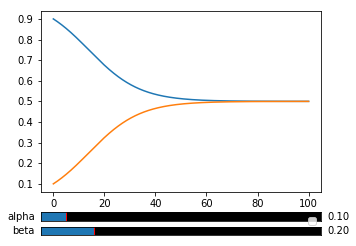

In [5]:
# initial conditions:
S0 = 0.9
I0 = 0.1
beta = 0.2
alpha = 0.1

t = np.linspace(0,100,10000)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

l1, l2 = plt.plot(t, integrate.odeint(SIS, [S0, I0], t, args=(beta, alpha)))
#solution = np.array(solution)

axcolor = 'black'
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_a = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sa = Slider(ax_b, 'beta', 0.01, 1, valinit=beta)
sc = Slider(ax_a, 'alpha', 0.01, 1, valinit=alpha)

def update(val):
    beta = sa.val
    alpha = sc.val
    y = integrate.odeint(SIS, [S0,I0], t, (beta, alpha))
    l1.set_ydata(y[:,0])
    l2.set_ydata(y[:,1])
    fig.canvas.draw_idle()

sa.on_changed(update)
sc.on_changed(update)
plt.legend()
plt.show()

We can of course generate an SIS model with an open population by the same logic as before. The equations are:

$\frac{dS}{dt} = -\frac{\beta S(t)I(t)}{N} + \gamma I(t) + \mu N - \nu S(t) $

$\frac{dI}{dt} = \frac{\beta S(t)I(t)}{N} - \gamma I(t) - \nu I(t)$


There is an even simpler model of the SIS model: the SI model. In the SI model, individuals are either susceptible, or they are infected. Once infected, people remain infected; there is no transfer back to being susceptible. Whilst this model may seen simplistic to the point of absurdity, it does model diseases such as the various forms of herpes.




The equations for a closed population are:




The equations for an open population are:



With the SIS model considered, let us look at some further modifications to the SIR model.

The SEIR model:

The SEIR model is an extension of the SIR model which includes a transitionary 'Exposed' stage: a period in which an individual has caught a disease, but is not yet infecting others. Classic examples of this is varicella (chicken pox) which has an incubation period of around 14-16 days, salmonella at 12-24 days, and mono at 28-42 days.



For a closed population, the equations are as follows:

$\frac{dS}{dt} = -\frac{\beta SI}{N}$

$\frac{dE}{dt} = \frac{\beta SI}{N} - \sigma E$

$\frac{dI}{dt} = \sigma E - \gamma I$

$\frac{dR}{dt} = \gamma I$

In [6]:
def SEIR(y, t, beta, gamma, sigma):
    S, E, I, R = y
    
    dS_dt = -beta * S * I
    dE_dt = beta * S * I - sigma*E
    dI_dt = beta * S * I - gamma*I
    dR_dt = gamma * I
    
    return [dS_dt, dE_dt, dI_dt, dR_dt]

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


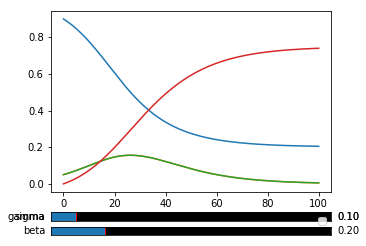

In [7]:
# initial conditions:
S0 = 0.9
E0 = 0.05
I0 = 0.05
R0 = 0.0
beta = 0.2
gamma = 0.1
sigma = 0.1

t = np.linspace(0,100,10000)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

l1, l2, l3, l4 = plt.plot(t, integrate.odeint(SEIR, [S0, E0, I0, R0], t, args=(beta, gamma, sigma)), label=('S0', 'I0', 'R0'))
#solution = np.array(solution)

axcolor = 'black'
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_g = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_s = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)


sb = Slider(ax_b, 'beta', 0.01, 1, valinit=beta)
sg = Slider(ax_g, 'gamma', 0.01, 1, valinit=gamma)
ss = Slider(ax_s, 'sigma', 0.01, 1, valinit=sigma)


def update(val):
    beta = sb.val
    gamma = sg.val
    y = integrate.odeint(SIR, [S0,I0,R0], t, (beta, gamma))
    l1.set_ydata(y[:,0])
    l2.set_ydata(y[:,1])
    l3.set_ydata(y[:,2])
    l4.set_ydata(y[:,3])
    fig.canvas.draw_idle()

sa.on_changed(update)
sc.on_changed(update)
plt.legend()
plt.show()

In [ ]:
def SEIR_open(y, t, beta, gamma, sigma):
    S, E, I, R = y
    
    dS_dt = -beta * S * I
    dE_dt = beta * S * I - sigma*E
    dI_dt = beta * S * I - gamma*I
    dR_dt = gamma * I
    
    return [dS_dt, dE_dt, dI_dt, dR_dt]

Now let us expand this to an open population. Again, we assume that $\mu = \nu$, and so on.

For an open population, the equations are as follows:

$\frac{dS}{dt} = -\frac{\beta SI}{N} + \mu N - \nu S$

$\frac{dE}{dt} = \frac{\beta SI}{N} - \sigma E - \nu E$

$\frac{dI}{dt} = \sigma E - \gamma I - \nu I$

$\frac{dR}{dt} = \gamma I - \nu R$

Let us continue to increase the complexity of our model by extending it to the SEIRS model. In the SEIR model (and the SIR and SIS models), we assume that once an infected person has recovered from a disease, that they acquire immunity for the rest of their life. In other words, we assume that a recovered person doesn't ever become susceptible again. This is of course not true for many diseases, such as typhoid.

In the SEIRS model, then, the extra S also stands for susceptible, and we must add extra terms to our model:

In a closed population:

$\frac{dS}{dt} = -\frac{\beta SI}{N} + \xi R$

$\frac{dE}{dt} = \frac{\beta SI}{N} - \sigma E$

$\frac{dI}{dt} = \sigma E - \gamma I$

$\frac{dR}{dt} = \gamma I - \xi R$


For an open population:

$\frac{dS}{dt} = -\frac{\beta SI}{N} + \xi R + \mu N - \nu S $

$\frac{dE}{dt} = \frac{\beta SI}{N} - \sigma E - \nu E$

$\frac{dI}{dt} = \sigma E - \gamma I - \nu I$

$\frac{dR}{dt} = \gamma I - \xi R - \nu R$


Now let's take a step backwards. There are many diseases in which a form of short-term maternal immunity is provided. This is due to passive immunity, where the mother's antibodies are passed to the foetus. A classic example of this is measles.

From this, let's consider the MSIR model:

$\frac{dM}{dT} = \Lambda - \delta M - \mu M$

$\frac{dS}{dT} = \delta M - \frac{\beta SI}{N} - \mu S$

$\frac{dS}{dT} = \frac{\beta SI}{N} - \gamma I - \mu I$

$\frac{dS}{dT} = \gamma I - \mu R$